In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np
import pandas as pd
import vectorbt as vbt
from core.data_loader import DataLoader
import os
import sys
from core.backtester import Backtester
from strategies.atr_breakout import ATRTrailingBreakout
from strategies.multi_momentum import MultiTimeframeMomentum
from strategies.vwap_reversion import VWAPReversion
from strategies.bb_rsi import BB_RSI
import logging
from datetime import datetime
import pandas as pd

In [6]:
# Налаштування логування
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Завантаження даних
loader = DataLoader()
data_file = 'sol_1m_mrhapr25_askbid.parquet'
if not os.path.exists(os.path.join('data', data_file)):
    logger.info("Завантаження даних...")
    dfm = loader.fetch_historical_bid_ask('SOLBTC', '1m', start_date='2025-03-01', end_date='2025-05-01')
    loader.save_data({'SOLBTC': dfm}, data_file)
else:
    dfm = loader.load_data(data_file)
    dfm = dfm['SOLBTC']
data = dfm['close']
symbol = 'SOLBTC'
dfm
split_point = len(dfm) // 2
test_dfm = dfm.iloc[split_point:]
dfm = dfm.iloc[:split_point]
test_dfm

INFO:__main__:Завантаження даних...


,open,high,low,close,volume,bid,ask
timestamp,,,,,,,
2025-03-24 06:50:00,0.001586,0.001587,0.001586,0.001586,13.185,0.001586,0.001586
2025-03-24 06:51:00,0.001586,0.001586,0.001585,0.001585,16.097,0.001585,0.001586
2025-03-24 06:52:00,0.001585,0.001586,0.001585,0.001586,82.180,0.001585,0.001586
2025-03-24 06:53:00,0.001586,0.001586,0.001584,0.001584,112.869,0.001584,0.001585
2025-03-24 06:54:00,0.001584,0.001585,0.001584,0.001584,40.313,0.001584,0.001584
...,...,...,...,...,...,...,...
2025-04-16 13:36:00,0.001492,0.001492,0.001491,0.001492,148.610,0.001492,0.001492
2025-04-16 13:37:00,0.001492,0.001493,0.001492,0.001493,134.596,0.001493,0.001493
2025-04-16 13:38:00,0.001493,0.001496,0.001493,0.001496,405.974,0.001496,0.001496


In [7]:
# Налаштування логування
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Завантаження даних
loader = DataLoader()
data_file = 'sol_1h_mrhapr25_askbid.parquet'
if not os.path.exists(os.path.join('data', data_file)):
    logger.info("Завантаження даних...")
    dfh = loader.fetch_historical_bid_ask('SOLBTC', '1h', start_date='2025-03-01', end_date='2025-05-01')
    loader.save_data({'SOLBTC': dfh}, data_file)
else:
    dfh = loader.load_data(data_file)
    dfh = dfh['SOLBTC']
data = dfh['close']
symbol = 'SOLBTC'
dfh
split_point = len(dfh) // 2
test_dfh = dfh.iloc[split_point:]
dfh = dfh.iloc[:split_point]
test_dfh

INFO:__main__:Завантаження даних...


,open,high,low,close,volume,bid,ask
timestamp,,,,,,,
2025-03-24 07:00:00,0.001584,0.001601,0.001581,0.001599,4776.848,0.001599,0.001599
2025-03-24 08:00:00,0.001599,0.001610,0.001593,0.001605,11790.046,0.001605,0.001605
2025-03-24 09:00:00,0.001605,0.001607,0.001600,0.001605,7502.096,0.001605,0.001605
2025-03-24 10:00:00,0.001605,0.001625,0.001605,0.001615,13055.267,0.001615,0.001616
2025-03-24 11:00:00,0.001615,0.001643,0.001613,0.001635,19940.018,0.001635,0.001635
...,...,...,...,...,...,...,...
2025-04-16 09:00:00,0.001494,0.001498,0.001486,0.001488,6323.273,0.001487,0.001488
2025-04-16 10:00:00,0.001488,0.001500,0.001487,0.001500,6717.061,0.001499,0.001500
2025-04-16 11:00:00,0.001499,0.001505,0.001491,0.001502,4825.181,0.001502,0.001502


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf  # Optional - for fetching data

def calculate_bollinger_bands(data, window=20, num_std=2):
    """
    Calculate Bollinger Bands with forward shift to avoid look-ahead bias.
    
    Parameters:
    - data: Pandas Series of closing prices
    - window: Moving average window (typically 20)
    - num_std: Number of standard deviations for the bands (typically 2)
    
    Returns:
    - DataFrame with columns: Middle Band, Upper Band, Lower Band
    """
    rolling_mean = data.rolling(window=window).mean()
    rolling_std = data.rolling(window=window).std()
    
    upper_band = rolling_mean + (rolling_std * num_std)
    lower_band = rolling_mean - (rolling_std * num_std)
    
    # Shift all bands forward by 1 to avoid look-ahead bias
    return pd.DataFrame({
        'Middle Band': rolling_mean.shift(1),
        'Upper Band': upper_band.shift(1),
        'Lower Band': lower_band.shift(1)
    })

# def keep_last_true_in_sequence(series):
#     """
#     Process a boolean Series to keep only the last True in each uninterrupted sequence.
    
#     Args:
#         series: pandas Series of boolean values
        
#     Returns:
#         A new Series with only the last True from each True sequence
#     """
#     # Initialize the result Series with all False
#     result = pd.Series(False, index=series.index)
    
#     # Find the boundaries of True sequences
#     shifted = series.shift(1, fill_value=False)
#     starts = series & ~shifted  # First True in sequence
#     ends = series & ~series.shift(-1, fill_value=False)  # Last True in sequence
    
#     # Keep only the last True in each sequence
#     result[ends] = True
    
#     return result

def identify_crossovers(close_prices, bb_df):
    """
    Identify where price crosses Bollinger Bands.
    
    Returns:
    - DataFrame with crossover signals:
      - 'Upper Cross': Price crosses above upper band
      - 'Lower Cross': Price crosses below lower band
    """
    signals = pd.DataFrame(index=close_prices.index)
    signals['Upper Cross'] = (close_prices > bb_df['Upper Band'])
    signals['Lower Cross'] = (close_prices < bb_df['Lower Band'])
    return signals 

def generate_trading_signals(close_prices, bb_df, signals):
    """
    Generate a DataFrame with clear trading signals and positions.
    """
    trades = pd.DataFrame(index=close_prices.index)
    trades['Price'] = close_prices
    trades = trades.join(bb_df).join(signals)
    
    # Initialize position column
    trades['Position'] = 0
    
    # Generate signals (1 for long, -1 for short)
    trades.loc[trades['Lower Cross'], 'Position'] = 1
    trades.loc[trades['Upper Cross'], 'Position'] = -1
    
    return trades

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
import numpy as np

def plot_bollinger_bands_with_signals(close_prices=None, timestamps=None,
                                     middle_band=None, upper_band=None, lower_band=None,
                                     buy_signals=None, sell_signals=None,
                                     title='Bollinger Bands'):
    """
    Flexible Bollinger Bands plot that only shows what you provide
    
    Parameters (all optional):
        close_prices: Price data
        timestamps: Corresponding time data
        middle_band: Middle band values
        upper_band: Upper band values  
        lower_band: Lower band values
        buy_signals: Boolean array of buy signals
        sell_signals: Boolean array of sell signals
        title: Plot title
    """
    plt.figure(figsize=(14, 7))
    
    # Generate default x-axis if no timestamps provided
    if timestamps is None:
        if close_prices is not None:
            timestamps = np.arange(len(close_prices))
        elif middle_band is not None:
            timestamps = np.arange(len(middle_band))
        elif upper_band is not None:
            timestamps = np.arange(len(upper_band))
        elif lower_band is not None:
            timestamps = np.arange(len(lower_band))
        else:
            raise ValueError("No data provided to plot")

    # Plot price if provided
    if close_prices is not None:
        plt.plot(timestamps, close_prices, label='Price', color='blue', alpha=0.7)

    # Plot bands if provided
    if middle_band is not None:
        plt.plot(timestamps, middle_band, label='Middle Band', color='red', linestyle='--')
    
    if upper_band is not None and lower_band is not None:
        plt.plot(timestamps, upper_band, label='Upper Band', color='yellow')
        plt.plot(timestamps, lower_band, label='Lower Band', color='yellow')
        plt.fill_between(timestamps, upper_band, lower_band, color='gray', alpha=0.1)
    else:
        if upper_band is not None:
            plt.plot(timestamps, upper_band, label='Upper Band', color='yellow')
        if lower_band is not None:
            plt.plot(timestamps, lower_band, label='Lower Band', color='yellow')

    # Plot signals if provided
    if buy_signals is not None and close_prices is not None:
        buy_mask = np.asarray(buy_signals, dtype=bool)
        plt.scatter(timestamps[buy_mask], np.asarray(close_prices)[buy_mask],
                   color='green', marker='^', s=100, label='Buy Signal')
    
    if sell_signals is not None and close_prices is not None:
        sell_mask = np.asarray(sell_signals, dtype=bool)
        plt.scatter(timestamps[sell_mask], np.asarray(close_prices)[sell_mask],
                   color='red', marker='v', s=100, label='Sell Signal')

    plt.title(title)
    if any(isinstance(t, (np.datetime64, datetime)) for t in timestamps[:1]):
        plt.gcf().autofmt_xdate()  # Rotate dates if they're timestamps
    
    plt.xlabel('Time' if timestamps is not None else 'Index')
    plt.ylabel('Price')
    
    if any([close_prices is not None, middle_band is not None, 
            upper_band is not None, lower_band is not None,
            buy_signals is not None, sell_signals is not None]):
        plt.legend()
    
    plt.grid(True)
    plt.show()

In [55]:
# Calculate Bollinger Bands
bb = vbt.BBANDS.run(dfh['close'], window=14, alpha=2)

# Initialize signals and price trackers
entries = pd.Series(False, index=dfh.index)
exits = pd.Series(False, index=dfh.index)
prices = pd.Series(np.nan, index=dfh.index)

for i in range(14, len(dfh)):
    prev_high = dfh['high'].iloc[i-1]
    prev_low = dfh['low'].iloc[i-1]
    current_low = dfh['low'].iloc[i]
    current_high = dfh['high'].iloc[i]
    current_close = dfh['close'].iloc[i]
    lower_band = bb.lower.shift(1).iloc[i]
    upper_band = bb.upper.shift(1).iloc[i]
    
    # Buy signal: Price enters lower band (from above)
    if (
        # (last_sell_price > lower_band * (1 + pers)) and
        (prev_low < lower_band) and 
        (current_high > lower_band)):
        entries.iloc[i] = True
        prices.iloc[i] = lower_band  # Use band price

    # Sell signal: Price enters upper band (from below)
    if (
        # (last_buy_price < upper_band * 1 - pers) and
        (prev_high > upper_band) and 
        (current_low < upper_band)):
        exits.iloc[i] = True
        prices.iloc[i] = upper_band  # Use band price

# Create portfolio using actual execution prices
pf = vbt.Portfolio.from_signals(
    close=dfh['close'],
    entries=entries,
    exits=exits,
    price=prices.fillna(dfh['close']),
    fees=0.001,  # 0.1% fee per trade
    # slippage=0.001,  # 0.1% slippage per trade
    freq='1h'
)
pf.stats()['Total Return [%]']

np.float64(10.564186962732677)

In [56]:
pf.plot()

FigureWidget({
    'data': [{'legendgroup': '0',
              'line': {'color': '#1f77b4'},
              'name': 'Close',
              'showlegend': True,
              'type': 'scatter',
              'uid': '55fee1b8-4c3b-4af0-8c93-561ae073b497',
              'x': array([datetime.datetime(2025, 3, 1, 0, 0),
                          datetime.datetime(2025, 3, 1, 1, 0),
                          datetime.datetime(2025, 3, 1, 2, 0), ...,
                          datetime.datetime(2025, 3, 24, 4, 0),
                          datetime.datetime(2025, 3, 24, 5, 0),
                          datetime.datetime(2025, 3, 24, 6, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([0.0017401, 0.0017747, 0.0017272, ..., 0.0016026, 0.0015885, 0.0015834]),
              'yaxis': 'y'},
             {'customdata': array([[0.00000000e+00, 6.02184469e+04, 9.99000999e-02],
                                   [2.00000000e+00, 6.21408942e+04, 1.09455176e-01],
                    

In [34]:
bb.lower.shift(1).reindex(dfm.index).ffill().loc['2025-03-03 12']

timestamp
2025-03-03 12:00:00    0.001751
2025-03-03 12:01:00    0.001751
2025-03-03 12:02:00    0.001751
2025-03-03 12:03:00    0.001751
2025-03-03 12:04:00    0.001751
2025-03-03 12:05:00    0.001751
2025-03-03 12:06:00    0.001751
2025-03-03 12:07:00    0.001751
2025-03-03 12:08:00    0.001751
2025-03-03 12:09:00    0.001751
2025-03-03 12:10:00    0.001751
2025-03-03 12:11:00    0.001751
2025-03-03 12:12:00    0.001751
2025-03-03 12:13:00    0.001751
2025-03-03 12:14:00    0.001751
2025-03-03 12:15:00    0.001751
2025-03-03 12:16:00    0.001751
2025-03-03 12:17:00    0.001751
2025-03-03 12:18:00    0.001751
2025-03-03 12:19:00    0.001751
2025-03-03 12:20:00    0.001751
2025-03-03 12:21:00    0.001751
2025-03-03 12:22:00    0.001751
2025-03-03 12:23:00    0.001751
2025-03-03 12:24:00    0.001751
2025-03-03 12:25:00    0.001751
2025-03-03 12:26:00    0.001751
2025-03-03 12:27:00    0.001751
2025-03-03 12:28:00    0.001751
2025-03-03 12:29:00    0.001751
2025-03-03 12:30:00    0.00175

In [58]:
lower = bb.lower.shift(1).reindex(dfm.index).ffill()
upper = bb.upper.shift(1).reindex(dfm.index).ffill()
prev_lows = dfh['low'].shift(1).reindex(dfm.index).ffill()
prev_highs = dfh['high'].shift(1).reindex(dfm.index).ffill()

In [59]:
# Initialize signals and price trackers
entries = pd.Series(False, index=dfm.index)
exits = pd.Series(False, index=dfm.index)
prices = pd.Series(np.nan, index=dfm.index)

# bb = vbt.BBANDS.run(dfm['close'], window=14, alpha=2)

for i in range(13*60, len(dfm)):
    prev_high = prev_highs.iloc[i]
    prev_low = prev_lows.iloc[i]
    current_low = dfm['low'].iloc[i]
    current_high = dfm['high'].iloc[i]
    current_close = dfm['close'].iloc[i]
    lower_band = lower.iloc[i]
    upper_band = upper.iloc[i]
    # lower_band = bb.lower.shift(1).iloc[i]
    # upper_band = bb.upper.shift(1).iloc[i]
    
    # Buy signal: Price enters lower band (from above)
    if (
        # (last_sell_price > lower_band * (1 + pers)) and
        (prev_low < lower_band) and (current_high > lower_band)):
        entries.iloc[i] = True
        prices.iloc[i] = lower_band  # Use band price

    # Sell signal: Price enters upper band (from below)
    if (
        # (last_buy_price < upper_band * 1 - pers) and
        (prev_high > upper_band) and (current_low < upper_band)):
        exits.iloc[i] = True
        prices.iloc[i] = upper_band  # Use band price

# Create portfolio using actual execution prices
pf = vbt.Portfolio.from_signals(
    close=dfm['close'],
    entries=entries,
    exits=exits,
    price=prices.fillna(dfm['close']),
    fees=0.001,  # 0.1% fee per trade
    # slippage=0.001,  # 0.1% slippage per trade
    freq='1m'
)
pf.stats()['Total Return [%]']

np.float64(10.564186962732677)

In [60]:
pf.plot()

FigureWidget({
    'data': [{'legendgroup': '0',
              'line': {'color': '#1f77b4'},
              'name': 'Close',
              'showlegend': True,
              'type': 'scatter',
              'uid': '800f8b8c-64ae-4548-ab53-5834ccc86cc4',
              'x': array([datetime.datetime(2025, 3, 1, 0, 0),
                          datetime.datetime(2025, 3, 1, 0, 1),
                          datetime.datetime(2025, 3, 1, 0, 2), ...,
                          datetime.datetime(2025, 3, 24, 6, 47),
                          datetime.datetime(2025, 3, 24, 6, 48),
                          datetime.datetime(2025, 3, 24, 6, 49)], dtype=object),
              'xaxis': 'x',
              'y': array([0.0017536, 0.0017531, 0.0017511, ..., 0.0015861, 0.0015858, 0.0015856]),
              'yaxis': 'y'},
             {'customdata': array([[0.00000000e+00, 6.02184469e+04, 9.99000999e-02],
                                   [2.00000000e+00, 6.21408942e+04, 1.09455176e-01],
                 

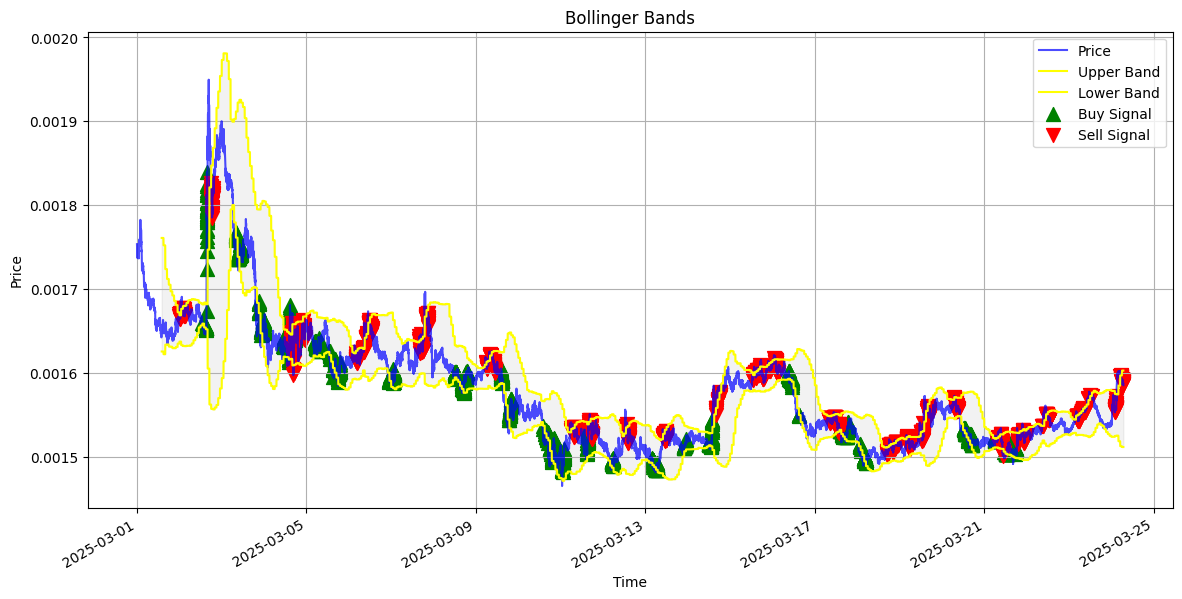

In [61]:
plot_bollinger_bands_with_signals(dfm['close'], dfm['close'].index, middle_band=None,
                                  upper_band=upper, lower_band=lower, buy_signals=entries, sell_signals=exits)

In [62]:
import numpy as np
import pandas as pd
import vectorbt as vbt
import yfinance as yf
from matplotlib import pyplot as plt

def optimize_bollinger_bands(df, window_range, std_range, wait_range):
    """
    Optimize Bollinger Bands with execution price memory using iloc:
    - For buys: must be ≤ last sell price * 0.96 (4% lower)
    - For sells: must be ≥ last buy price * 1.04 (4% higher)
    """
    results = []
    total_combinations = len(window_range) * len(std_range) * len(wait_range)
    progress_bar = tqdm(total=total_combinations, desc="Optimizing parameters")
    
    for params in [(w, s, m) for w in window_range for s in std_range for m in wait_range]:
        window, std, m = params
        
        pf = bb_strategy_tester(df, window, std)
        
        # Store results
        stats = pf.stats()
        results.append({
            'window': window,
            'std': std,
            'total_return': stats['Total Return [%]'],
            'sharpe_ratio': stats['Sharpe Ratio'],
            'win_rate': stats['Win Rate [%]'],
            'profit_factor': stats['Profit Factor'],
            'trades': stats['Total Trades'],
            'portfolio': pf
        })
        
        progress_bar.update(1)
    
    progress_bar.close()
    results_df = pd.DataFrame(results)
    
    best_idx = results_df['total_return'].idxmax()
    best_window = results_df.loc[best_idx, 'window']
    best_std = results_df.loc[best_idx, 'std']
    best_pf = results_df.loc[best_idx, 'portfolio']
    
    return best_window, best_std, results_df, best_pf

In [63]:

# Parameter ranges to test
window_range = range(1, 36, 1)  # From 10 to 50 in steps of 5
std_range = np.arange(0.5, 3.0, 0.1)  # From 1.5 to 3.0 in steps of 0.25
wait_range = np.arange(0, 1, 1)  # From 0.5 to 1.5 in steps of 0.1

# Run optimization
best_window, best_std, results_df, best_pf = optimize_bollinger_bands(
    df, window_range, std_range, wait_range
)

print(f"\nOptimal Parameters - Window: {best_window}, Std: {best_std:.2f}")
print("\nPerformance Metrics with Optimal Parameters:")
print(best_pf.stats())

# Plot heatmap of Total Return
pivot_table = results_df.pivot(index='window', columns='std', values='total_return')
plt.figure(figsize=(12, 6))
plt.title('Total Return Heatmap')
plt.xlabel('Standard Deviation')
plt.ylabel('Window Size')
plt.imshow(pivot_table, cmap='viridis', aspect='auto')
plt.colorbar(label='Total Return')
plt.xticks(range(len(std_range)), [f"{s:.2f}" for s in std_range])
plt.yticks(range(len(window_range)), window_range)
plt.show()

NameError: name 'df' is not defined

In [ ]:
# bb = vbt.BBANDS.run(close_price, window=window, alpha=std)
        
#         # Initialize execution price memory
#         last_buy_price = np.nan
#         last_sell_price = np.nan
        
#         # Initialize filtered signals
#         filtered_entries = pd.Series(False, index=close_price.index)
#         filtered_exits = pd.Series(False, index=close_price.index)
        
#         # Generate raw signals
#         # df = identify_crossovers(close_price, 
#         #     pd.DataFrame({'Upper Band': bb.upper.shift(1), 'Lower Band': bb.lower.shift(1)}))
#         # raw_entries = df['Upper Cross']
#         # raw_exits = df['Lower Cross']

#         raw_entries = close_price.vbt.crossed_above(bb.lower.shift(1), wait=m)
#         raw_exits = close_price.vbt.crossed_below(bb.upper.shift(1), wait=m)            
        
#         # for i in range(len(close_price)):
#         #     current_price = close_price.iloc[i]
            
#         #     # Handle buys
#         #     if raw_entries.iloc[i]:
#         #         if np.isnan(last_sell_price) or current_price <= last_sell_price * 0.96:
#         #             filtered_entries.iloc[i] = True
#         #             last_buy_price = current_price
            
#         #     # Handle sells
#         #     if raw_exits.iloc[i]:
#         #         if np.isnan(last_buy_price) or current_price >= last_buy_price * 1.04:
#         #             filtered_exits.iloc[i] = True
#         #             last_sell_price = current_price
        
#         # Run backtest
#         pf = vbt.Portfolio.from_signals(
#             close_price,
#             raw_entries, raw_exits,
#             # filtered_entries, filtered_exits,
#             fees=0.001,
#             slippage=0.001,
#             freq='1h',
#             price = bb.lower.where(raw_entries)  # Long entries
#                 .fillna(bb.upper.where(raw_exits))  # Long exits
#                 .fillna(close_price)
#         )

In [32]:
best_pf.plot()

FigureWidget({
    'data': [{'legendgroup': '0',
              'line': {'color': '#1f77b4'},
              'name': 'Close',
              'showlegend': True,
              'type': 'scatter',
              'uid': '33d72a9b-2938-4b49-b514-6308db8bf4d9',
              'x': array([datetime.datetime(2025, 3, 1, 0, 0),
                          datetime.datetime(2025, 3, 1, 1, 0),
                          datetime.datetime(2025, 3, 1, 2, 0), ...,
                          datetime.datetime(2025, 4, 15, 8, 0),
                          datetime.datetime(2025, 4, 15, 9, 0),
                          datetime.datetime(2025, 4, 15, 10, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([0.0017401, 0.0017747, 0.0017272, ..., 0.0015342, 0.0015527, 0.001556 ]),
              'yaxis': 'y'},
             {'customdata': array([[0.00000000e+00, 5.91159875e+04, 9.99000999e-02],
                                   [2.00000000e+00, 6.03963525e+04, 1.00121751e-01],
                   

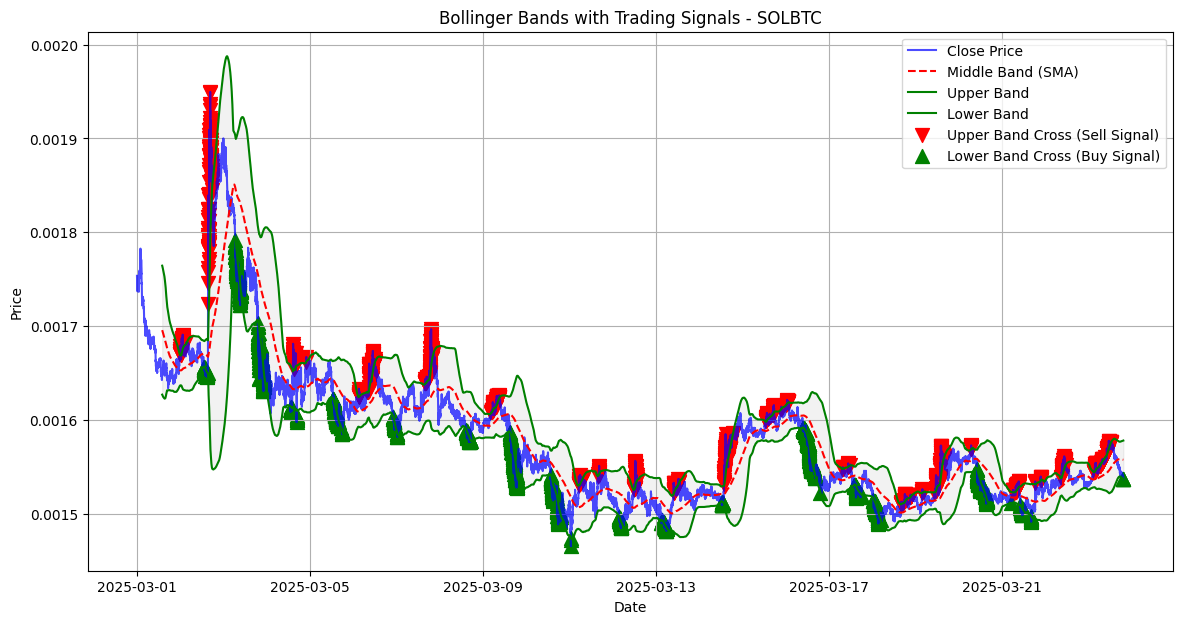

In [11]:
# bb_df = calculate_bollinger_bands(data, best_window, best_std)
bb_df = calculate_bollinger_bands(df['close'], 14*60, 2)
signals = identify_crossovers(df['close'], bb_df)
trades = generate_trading_signals(df['close'], bb_df, signals)

# Print some trading signals
# print("Sample Trading Signals:")
# print(trades[trades['Position'] != 0].head(10))

# Plot with signals
plot_bollinger_bands_with_signals(df['close'], bb_df, signals, symbol)

In [27]:
entries = data.vbt.crossed_above(bb_df['Lower Band'])
exits = data.vbt.crossed_below(bb_df['Upper Band'])

pf = vbt.Portfolio.from_signals(
    data,
    entries, exits,
    # signals['Lower Cross'], signals['Upper Cross'],
    fees=0.001,  # 0.1% fee per trade
    slippage=0.001,  # 0.1% slippage per trade
    freq='1h',
)
pf.plot()

FigureWidget({
    'data': [{'legendgroup': '0',
              'line': {'color': '#1f77b4'},
              'name': 'Close',
              'showlegend': True,
              'type': 'scatter',
              'uid': '41027f9b-44bd-468f-9aea-cfafeab5f1f4',
              'x': array([datetime.datetime(2025, 3, 1, 0, 0),
                          datetime.datetime(2025, 3, 1, 1, 0),
                          datetime.datetime(2025, 3, 1, 2, 0), ...,
                          datetime.datetime(2025, 4, 15, 8, 0),
                          datetime.datetime(2025, 4, 15, 9, 0),
                          datetime.datetime(2025, 4, 15, 10, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([0.0017401, 0.0017747, 0.0017272, ..., 0.0015342, 0.0015527, 0.001556 ]),
              'yaxis': 'y'},
             {'customdata': array([[0.00000000e+00, 6.03533500e+04, 9.99000999e-02],
                                   [2.00000000e+00, 6.27768723e+04, 1.09447817e-01],
                   

In [28]:
pf.stats()

Start                         2025-03-01 00:00:00
End                           2025-04-15 10:00:00
Period                           45 days 11:00:00
Start Value                                 100.0
End Value                              110.172294
Total Return [%]                        10.172294
Benchmark Return [%]                   -10.579852
Max Gross Exposure [%]                      100.0
Total Fees Paid                          3.631199
Max Drawdown [%]                        19.169179
Max Drawdown Duration            43 days 18:00:00
Total Trades                                   18
Total Closed Trades                            17
Total Open Trades                               1
Open Trade PnL                           1.347463
Win Rate [%]                            52.941176
Best Trade [%]                           9.566822
Worst Trade [%]                         -6.742142
Avg Winning Trade [%]                    3.293734
Avg Losing Trade [%]                    -2.497899


In [32]:
bb = vbt.BBANDS.run(data, window=best_window, alpha=best_std)
entries = data.vbt.crossed_above(bb.lower.shift(1))
exits = data.vbt.crossed_below(bb.upper.shift(1))

pf = vbt.Portfolio.from_signals(
    data,
    entries, exits,
    fees=0.001,
    slippage=0.001,
    freq='1h',
)
pf.stats()


Start                         2025-03-01 00:00:00
End                           2025-04-15 10:00:00
Period                           45 days 11:00:00
Start Value                                 100.0
End Value                              117.267752
Total Return [%]                        17.267752
Benchmark Return [%]                   -10.579852
Max Gross Exposure [%]                      100.0
Total Fees Paid                           4.40554
Max Drawdown [%]                        15.348538
Max Drawdown Duration            39 days 20:00:00
Total Trades                                   21
Total Closed Trades                            20
Total Open Trades                               1
Open Trade PnL                           1.434244
Win Rate [%]                                 60.0
Best Trade [%]                           9.566822
Worst Trade [%]                         -6.742142
Avg Winning Trade [%]                    2.951355
Avg Losing Trade [%]                    -2.433203
